In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_og = pd.read_csv("../../data/pokemon.csv")
df_og

,Dex No,Name,Base Name,Type 1,Type 2,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
0,1,Bulbasaur,Bulbasaur,GRASS,POISON,318,45,49,49,65,65,45
1,2,Ivysaur,Ivysaur,GRASS,POISON,405,60,62,63,80,80,60
2,3,Venusaur,Venusaur,GRASS,POISON,525,80,82,83,100,100,80
3,3,Mega Venusaur,Venusaur,GRASS,POISON,625,80,100,123,122,120,80
4,4,Charmander,Charmander,FIRE,-,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1006,Iron Valiant,Iron Valiant,FAIRY,FIGHTING,590,74,130,90,120,60,116
1190,1007,Koraidon,Koraidon,FIGHTING,DRAGON,670,100,135,115,85,100,135
1191,1008,Miraidon,Miraidon,ELECTRIC,DRAGON,670,100,85,100,135,115,135
1192,1009,Walking Wake,Walking Wake,WATER,DRAGON,590,99,83,91,125,83,109


In [6]:
df_og.describe()

,Dex No,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [7]:
df_og.isnull().sum()

Dex No         0
Name           0
Base Name      0
Type 1         0
Type 2         0
BST            0
HP             0
Attack         0
Defense        0
Sp. Attack     0
Sp. Defense    0
Speed          0
dtype: int64

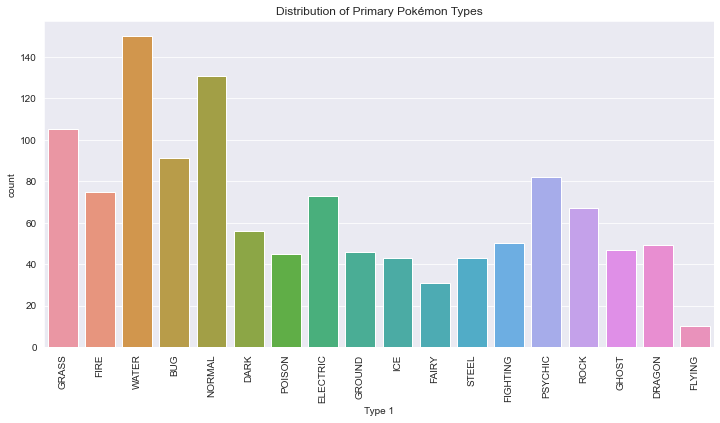

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_og, x='Type 1')
plt.xticks(rotation=90)
plt.title('Distribution of Primary Pokémon Types')
plt.show()

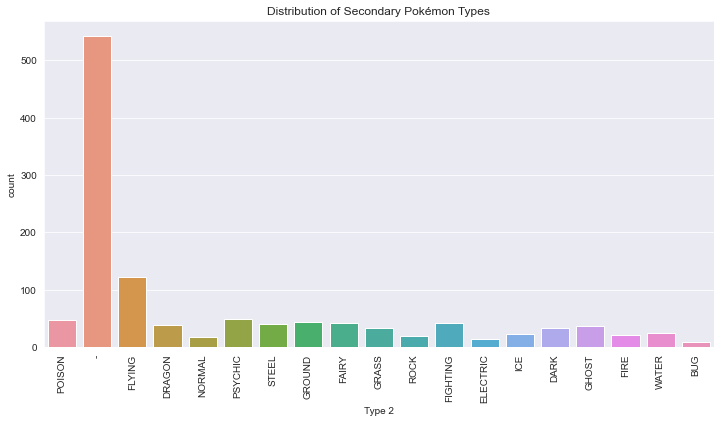

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_og, x='Type 2')
plt.xticks(rotation=90)
plt.title('Distribution of Secondary Pokémon Types')
plt.show()

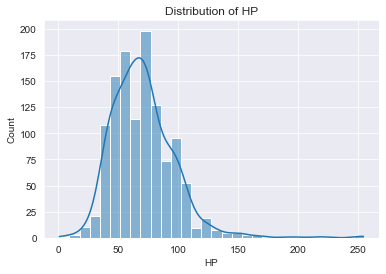

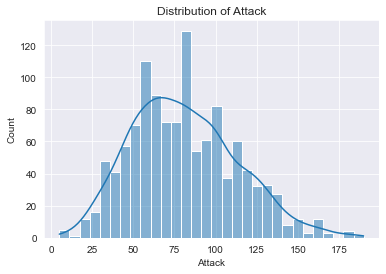

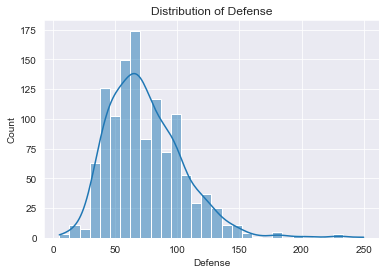

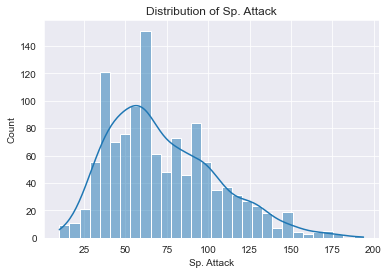

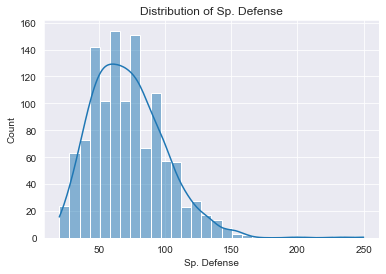

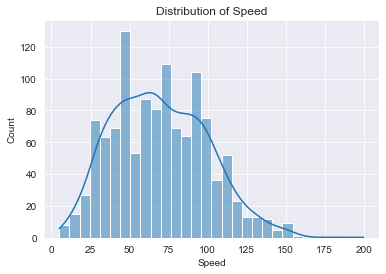

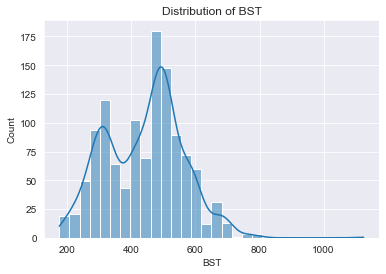

In [10]:
stats_features = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'BST']
for feature in stats_features:
    plt.figure()
    sns.histplot(df_og[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

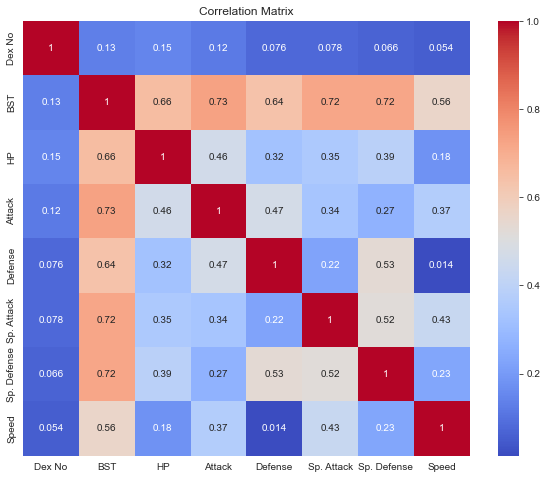

In [11]:
corr_matrix = df_og.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
strongest_pokemon = df_og.loc[df_og['BST'].idxmax()]
weakest_pokemon = df_og.loc[df_og['BST'].idxmin()]

print(f"The strongest Pokémon is {strongest_pokemon['Name']} with a BST of {strongest_pokemon['BST']}.")
print(f"The weakest Pokémon is {weakest_pokemon['Name']} with a BST of {weakest_pokemon['BST']}.")

The strongest Pokémon is Eternamax with a BST of 1125.
The weakest Pokémon is Solo Form with a BST of 175.


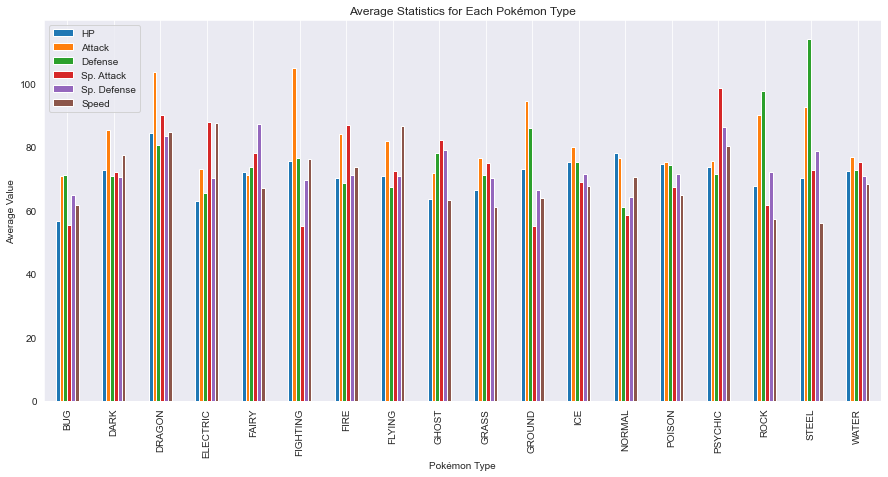

In [13]:
type_avg_stats = df_og.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']].mean()

type_avg_stats.plot(kind='bar', figsize=(15,7))
plt.title('Average Statistics for Each Pokémon Type')
plt.ylabel('Average Value')
plt.xlabel('Pokémon Type')
plt.grid(axis='y')
plt.show()

In [14]:
def get_generation(dex_no):
    if dex_no <= 151:
        return 1
    elif dex_no <= 251:
        return 2
    elif dex_no <= 386:
        return 3
    elif dex_no <= 493:
        return 4
    elif dex_no <= 649:
        return 5
    elif dex_no <= 721:
        return 6
    elif dex_no <= 809:
        return 7
    else:
        return 8

In [15]:
df_og['Generation'] = df_og['Dex No'].apply(get_generation)

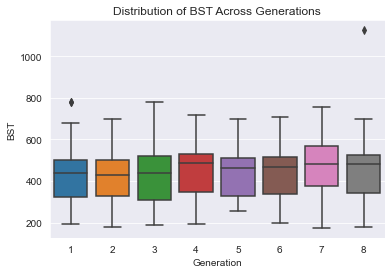

In [16]:
plt.figure()
sns.boxplot(x='Generation', y='BST', data=df_og)
plt.title('Distribution of BST Across Generations')
plt.show()